In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(".\datos_misteriosos_5.csv")

In [26]:
df.head()

,Alumno,x1,x2,x3,x4,x5
0,Luis,4,3,1,4,4
1,Pablo,3,4,4,4,3
2,Ro,5,4,4,3,5
3,Andrea,4,4,4,4,4
4,Mariana,2,3,5,5,4


In [5]:
X = df.iloc[:,1:]

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

In [8]:
x_t = pca.fit_transform(X)

In [9]:
df_pca= pd.DataFrame(x_t, columns= ['PC1','PC2'])
df_pca['Alumno'] = df['Alumno']

In [10]:
df_pca

,PC1,PC2,Alumno
0,0.381021,1.237836,Luis
1,1.088729,-1.944764,Pablo
2,3.008228,0.086272,Ro
3,2.169823,-1.042168,Andrea
4,1.361689,-2.346441,Mariana
5,-1.035679,1.467481,Nishi
6,1.233004,2.463931,Isa
7,0.914496,0.683322,Feli
8,2.139715,0.205553,Neto
9,-1.111497,-0.538971,Jerry


Text(0.5, 1.0, 'Método del codo')

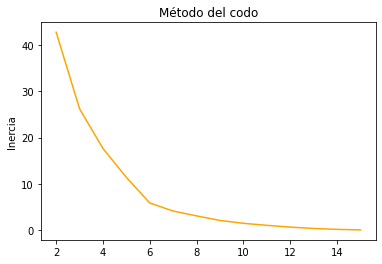

In [27]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []

ks = np.arange(2, 16)
for k in ks:
    kmeans = KMeans(n_clusters=k).fit(x_t)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(ks, sum_of_squared_distances, color = 'Orange')
plt.ylabel('Inercia')
plt.title('Método del codo')


In [28]:
df_kmeans = df_pca.copy()
kmeans = KMeans(n_clusters=6).fit(x_t)

In [29]:
df_kmeans['cluster'] = kmeans.labels_
df_kmeans['cluster'] = df_kmeans['cluster'].astype(str)

In [32]:
import plotly.express as px
fig = px.scatter(df_kmeans, x="PC1", y="PC2",  color = 'cluster', hover_data=['Alumno'])
fig.show()


In [41]:
from sklearn.cluster import MiniBatchKMeans
df_lotecitos = df_pca.copy()
lotecitos = MiniBatchKMeans(n_clusters=6, batch_size = 5).fit(x_t)
df_lotecitos['cluster'] = lotecitos.labels_
df_lotecitos['cluster'] = df_lotecitos['cluster'].astype(str)


In [42]:
fig = px.scatter(df_lotecitos, x="PC1", y="PC2",  color = 'cluster', hover_data=['Alumno'])
fig.show()


In [44]:
print('Inercia del k means:',kmeans.inertia_)
print('Inercia del mini batch k means', lotecitos.inertia_)

Inercia del k means: 5.830951960339419
Inercia del mini batch k means 7.57959497932392
